# **Task 1: Data Cleaning & Preprocessing**

****
**Objective: Learn how to clean and prepare raw data for ML.**
****
**Tools: Python, Pandas, NumPy, Matplotlib/Seaborn**
****


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

Importing Dataset and Exploring Basic Data Types

In [15]:
df = pd.read_csv("/content/train.csv")
#rows and colums
print("-----------------------------")
print("Datast Shape(rows,cols):- ")
print(df.shape)
print("-----------------------------")
#data type of each column
print("Data Types :-  ")
print(df.dtypes)
print("-----------------------------")
#Missing values
print("Number of Missing Values :- ")
print(df.isnull().sum())
print("-----------------------------")



-----------------------------
Datast Shape(rows,cols):- 
(1460, 81)
-----------------------------
Data Types :-  
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
-----------------------------
Number of Missing Values :- 
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
-----------------------------


In [16]:
print("Summary Stats :- ")
print(df.describe())

Summary Stats :- 
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.06620

Visualizing Missing Values

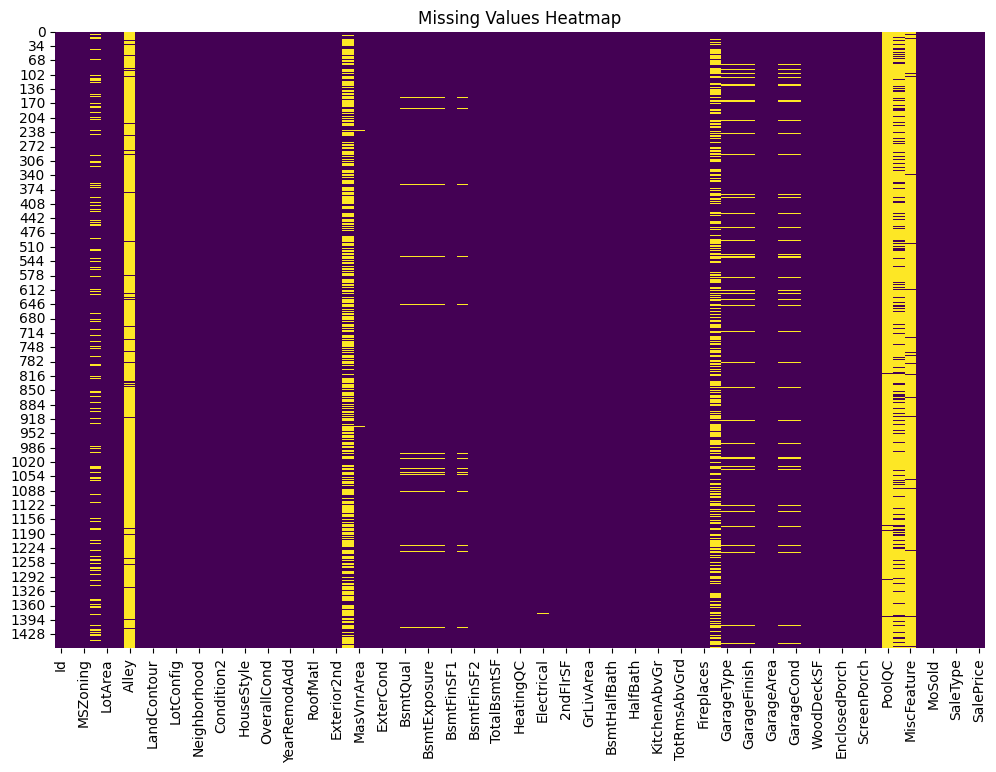

In [18]:
plt.figure(figsize=(12, 8 ))
sns.heatmap(df.isnull(), cbar=False,cmap ='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Handling Missing Values using Mean/Median/Imputation

In [20]:
#seperating numerical and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

#impute numerical missing values with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("missing values after imputation:- ")
print(df.isnull().sum())

print("before and after")
print(num_imputer.statistics_[num_cols.get_loc('LotFrontage')])

missing values after imputation:- 
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
before and after
69.0


Convert Categorical Features into Numerical Using Encoding

In [22]:
ordinal_cols = ['ExterQual','KitchenQual']
le = LabelEncoder()
for col in ordinal_cols:
  if col in df.columns:
    df[col] = le.fit_transform(df[col])

nominal_cols = list(set(cat_cols)-set(ordinal_cols))
df = pd.get_dummies(df,columns=nominal_cols,drop_first=True)

print("Shape After Encoding :- ",df.shape)
print(df.head())


Shape After Encoding :-  (1460, 242)
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1  2.0        20.0         80.0   9600.0          6.0          8.0     1976.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0     2001.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0     1915.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  ExterQual  ...  Foundation_Slab  \
0        2003.0       196.0          2  ...            False   
1        1976.0         0.0          3  ...            False   
2        2002.0       162.0          2  ...            False   
3        1970.0         0.0          3  ...            False   
4        2000.0       350.0          2  ...            False   

   Foundation_Stone  Foundation_Wood  BldgType_2fmCon  BldgType_Duplex  \
0             Fal

 Normalize/Standardize the Numerical Features


Scaled Data Sample:
          Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0   1.050994      0.878668    0.514104    0.575425  ...    0.351000   
1   0.156734     -0.429577   -0.570750    1.171992  ...   -0.060731   
2   0.984752      0.830215    0.325915    0.092907  ...    0.631726   
3  -1.863632     -0.720298   -0.570750   -0.499274  ...    0.790804   
4   0.951632      0.733308    1.366489    0.463568  ...    1.698485   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0   -0.752176  

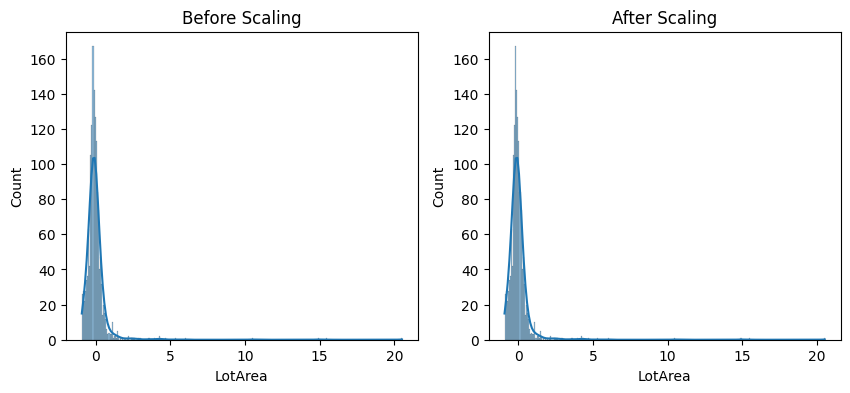

In [28]:
# Exclude target 'SalePrice' if you don't want to scale it
scale_cols = list(num_cols.drop('SalePrice'))  # Assuming SalePrice is target

# Create a copy of the original dataframe before scaling
df_original = df.copy()

# Standardize
scalr = StandardScaler()
df[scale_cols] = scalr.fit_transform(df[scale_cols])

# Check scaled data
print("\nScaled Data Sample:\n", df[scale_cols].head())

# Visualize before/after (histogram for one column, e.g., LotArea)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_original['LotArea'], kde=True)  # Use a copy of original df for comparison
plt.title('Before Scaling')
plt.subplot(1, 2, 2)
sns.histplot(df['LotArea'], kde=True)
plt.title('After Scaling')
plt.show()

Visualize Outliers Using Boxplots and Remove Them

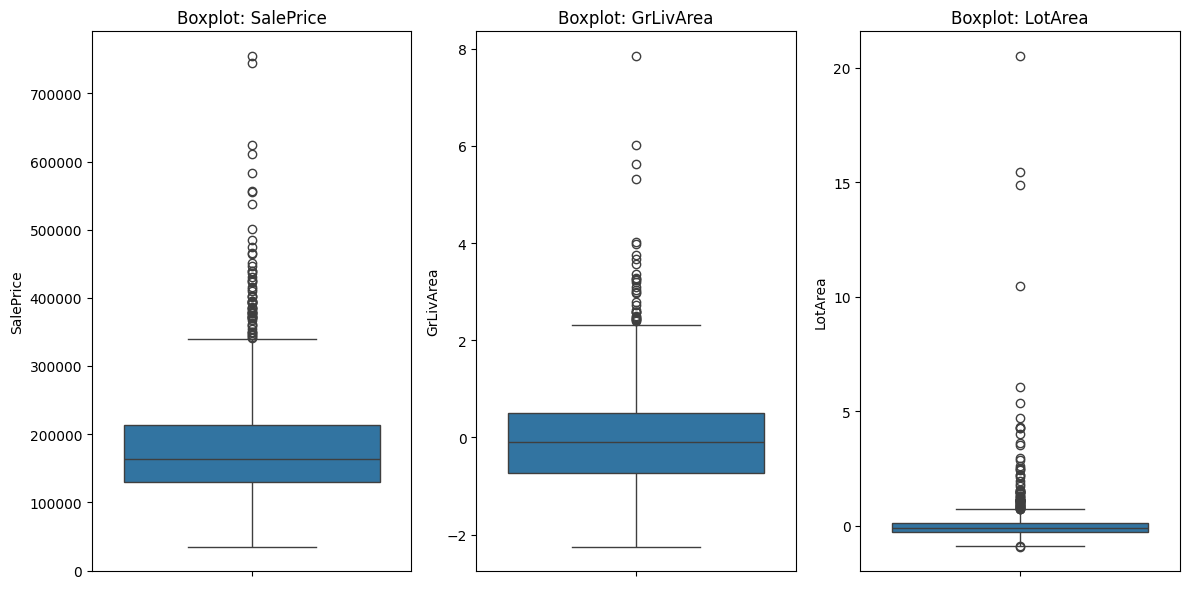


Shape After Outlier Removal: (1399, 242)


In [29]:
# Visualize boxplots for key numerical columns
key_num_cols = ['SalePrice', 'GrLivArea', 'LotArea']  # Add more
plt.figure(figsize=(12, 6))
for i, col in enumerate(key_num_cols, 1):
    plt.subplot(1, len(key_num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

# Remove outliers using IQR (example for SalePrice)
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['SalePrice'] < (Q1 - 1.5 * IQR)) | (df['SalePrice'] > (Q3 + 1.5 * IQR)))]

# Repeat for other columns if needed (e.g., GrLivArea)
# Check new shape
print("\nShape After Outlier Removal:", df.shape)
